In [46]:
import pandas as pd

In [47]:
df=pd.read_csv('customer_data.csv')

In [48]:
df.head()
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            20 non-null     object 
 1   Name                   20 non-null     object 
 2   Gender                 16 non-null     object 
 3   Age                    17 non-null     float64
 4   City                   20 non-null     object 
 5   Join_Date              20 non-null     object 
 6   Last_Purchase_Date     20 non-null     object 
 7   Total_Purchase_Amount  20 non-null     int64  
 8   Feedback_Score         20 non-null     int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.5+ KB


In [49]:
df.isna().sum()

Customer_ID              0
Name                     0
Gender                   4
Age                      3
City                     0
Join_Date                0
Last_Purchase_Date       0
Total_Purchase_Amount    0
Feedback_Score           0
dtype: int64

In [54]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Age"].fillna(df["Age"].median(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7272\1893049709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)


In [55]:
df["Age"]=df["Age"].astype('int')

In [56]:
valid_median=df.loc[(df["Age"]>=0)&(df["Age"]<=100),"Age"].median()

In [58]:
df.loc[(df["Age"]<=0)&(df["Age"]>=100),"Age"].fillna(valid_median,inplace=True)

In [62]:
df.isna().sum()

Customer_ID              0
Name                     0
Gender                   0
Age                      0
City                     0
Join_Date                0
Last_Purchase_Date       0
Total_Purchase_Amount    0
Feedback_Score           0
dtype: int64

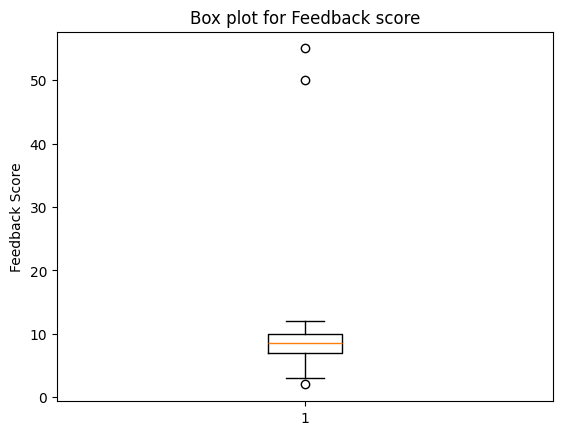

In [68]:
import matplotlib.pyplot as plt
box_plot=plt.boxplot(df["Feedback_Score"])
plt.title("Box plot for Feedback score")
plt.ylabel("Feedback Score")
plt.show()


In [69]:
#IQR method to remove outliers
Q1=df["Feedback_Score"].quantile(0.25)
Q3=df["Feedback_Score"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_no_outliers=df[(df["Feedback_Score"]>=lower_bound) & (df["Feedback_Score"]<upper_bound)]

In [72]:
upper_bound

14.5

In [70]:
df_no_outliers

,Customer_ID,Name,Gender,Age,City,Join_Date,Last_Purchase_Date,Total_Purchase_Amount,Feedback_Score
0,C001,Ravi Kumar,Male,25,Hyderabad,2023-01-01,2024-01-10,8270,8
1,C002,Anu Sharma,Female,30,Bangalore,2023-01-16,2024-01-20,1860,9
2,C003,Priya Das,Male,22,Chennai,2023-01-31,2024-01-30,6390,10
4,C005,Rohit Verma,Male,120,Pune,2023-03-02,2024-02-19,6734,7
5,C006,Kiran Kumar,Male,29,Bangalore,2023-03-17,2024-02-29,7265,6
6,C007,Sneha Rao,Male,28,Hyderabad,2023-04-01,2024-03-10,1466,9
7,C008,Pooja Iyer,Female,26,Chennai,2023-04-16,2024-03-20,5426,10
8,C009,Ajay Mehta,Male,35,Pune,2023-05-01,2024-03-30,6578,5
9,C010,Divya Singh,Female,40,Hyderabad,2023-05-16,2024-04-09,9322,8
10,C011,Teja Reddy,Male,31,Bangalore,2023-05-31,2024-04-19,2685,7


In [73]:
df=df_no_outliers

In [74]:
df

,Customer_ID,Name,Gender,Age,City,Join_Date,Last_Purchase_Date,Total_Purchase_Amount,Feedback_Score
0,C001,Ravi Kumar,Male,25,Hyderabad,2023-01-01,2024-01-10,8270,8
1,C002,Anu Sharma,Female,30,Bangalore,2023-01-16,2024-01-20,1860,9
2,C003,Priya Das,Male,22,Chennai,2023-01-31,2024-01-30,6390,10
4,C005,Rohit Verma,Male,120,Pune,2023-03-02,2024-02-19,6734,7
5,C006,Kiran Kumar,Male,29,Bangalore,2023-03-17,2024-02-29,7265,6
6,C007,Sneha Rao,Male,28,Hyderabad,2023-04-01,2024-03-10,1466,9
7,C008,Pooja Iyer,Female,26,Chennai,2023-04-16,2024-03-20,5426,10
8,C009,Ajay Mehta,Male,35,Pune,2023-05-01,2024-03-30,6578,5
9,C010,Divya Singh,Female,40,Hyderabad,2023-05-16,2024-04-09,9322,8
10,C011,Teja Reddy,Male,31,Bangalore,2023-05-31,2024-04-19,2685,7


In [78]:
df["first_name"]=df["Name"].str.split().str[0]
df["last_name"]=df["Name"].str.split().str[1]

C:\Users\DELL\AppData\Local\Temp\ipykernel_7272\2565123786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["first_name"]=df["Name"].str.split().str[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_7272\2565123786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["last_name"]=df["Name"].str.split().str[1]


In [79]:
df

,Customer_ID,Name,Gender,Age,City,Join_Date,Last_Purchase_Date,Total_Purchase_Amount,Feedback_Score,first_name,last_name
0,C001,Ravi Kumar,Male,25,Hyderabad,2023-01-01,2024-01-10,8270,8,Ravi,Kumar
1,C002,Anu Sharma,Female,30,Bangalore,2023-01-16,2024-01-20,1860,9,Anu,Sharma
2,C003,Priya Das,Male,22,Chennai,2023-01-31,2024-01-30,6390,10,Priya,Das
4,C005,Rohit Verma,Male,120,Pune,2023-03-02,2024-02-19,6734,7,Rohit,Verma
5,C006,Kiran Kumar,Male,29,Bangalore,2023-03-17,2024-02-29,7265,6,Kiran,Kumar
6,C007,Sneha Rao,Male,28,Hyderabad,2023-04-01,2024-03-10,1466,9,Sneha,Rao
7,C008,Pooja Iyer,Female,26,Chennai,2023-04-16,2024-03-20,5426,10,Pooja,Iyer
8,C009,Ajay Mehta,Male,35,Pune,2023-05-01,2024-03-30,6578,5,Ajay,Mehta
9,C010,Divya Singh,Female,40,Hyderabad,2023-05-16,2024-04-09,9322,8,Divya,Singh
10,C011,Teja Reddy,Male,31,Bangalore,2023-05-31,2024-04-19,2685,7,Teja,Reddy


In [83]:
df["is_name_starts_with_A"]=df["Name"].str.startswith('A')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7272\4046787301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_name_starts_with_A"]=df["Name"].str.startswith('A')


In [84]:
df

,Customer_ID,Name,Gender,Age,City,Join_Date,Last_Purchase_Date,Total_Purchase_Amount,Feedback_Score,first_name,last_name,is_name_starts_with_A
0,C001,Ravi Kumar,Male,25,Hyderabad,2023-01-01,2024-01-10,8270,8,Ravi,Kumar,False
1,C002,Anu Sharma,Female,30,Bangalore,2023-01-16,2024-01-20,1860,9,Anu,Sharma,True
2,C003,Priya Das,Male,22,Chennai,2023-01-31,2024-01-30,6390,10,Priya,Das,False
4,C005,Rohit Verma,Male,120,Pune,2023-03-02,2024-02-19,6734,7,Rohit,Verma,False
5,C006,Kiran Kumar,Male,29,Bangalore,2023-03-17,2024-02-29,7265,6,Kiran,Kumar,False
6,C007,Sneha Rao,Male,28,Hyderabad,2023-04-01,2024-03-10,1466,9,Sneha,Rao,False
7,C008,Pooja Iyer,Female,26,Chennai,2023-04-16,2024-03-20,5426,10,Pooja,Iyer,False
8,C009,Ajay Mehta,Male,35,Pune,2023-05-01,2024-03-30,6578,5,Ajay,Mehta,True
9,C010,Divya Singh,Female,40,Hyderabad,2023-05-16,2024-04-09,9322,8,Divya,Singh,False
10,C011,Teja Reddy,Male,31,Bangalore,2023-05-31,2024-04-19,2685,7,Teja,Reddy,False


In [87]:
df["reversed_column"]=df["Name"].apply(lambda x:x[::-1])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7272\2900603605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reversed_column"]=df["Name"].apply(lambda x:x[::-1])


In [96]:
import datetime as dt
df["Join_Date"]=pd.to_datetime(df["Join_Date"])
df["Last_Purchase_Date"]=pd.to_datetime(df["Last_Purchase_Date"])


In [97]:
df["days_since_last_purchase"]=(pd.Timestamp.today()-df["Last_Purchase_Date"]).dt.days

In [103]:
df.set_index("Last_Purchase_Date",inplace=True)

In [107]:
resample_month=df[["Total_Purchase_Amount"]].resample("M").mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7272\3478210775.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resample_month=df[["Total_Purchase_Amount"]].resample("M").mean()


In [108]:
resample_month

,Total_Purchase_Amount
Last_Purchase_Date,
2024-01-31,5506.666667
2024-02-29,6999.500000
2024-03-31,4490.000000
2024-04-30,6003.500000
2024-05-31,5897.666667
2024-06-30,5218.333333
2024-07-31,5555.000000


In [109]:
rolling7day=df["Total_Purchase_Amount"].rolling(window=7).mean()

In [110]:
rolling7day

Last_Purchase_Date
2024-01-10            NaN
2024-01-20            NaN
2024-01-30            NaN
2024-02-19            NaN
2024-02-29            NaN
2024-03-10            NaN
2024-03-20    5344.428571
2024-03-30    5102.714286
2024-04-09    6168.714286
2024-04-19    5639.428571
2024-05-09    5813.000000
2024-05-19    5265.571429
2024-05-29    5957.714286
2024-06-08    6047.000000
2024-06-18    6167.285714
2024-06-28    5147.571429
2024-07-08    5557.571429
Name: Total_Purchase_Amount, dtype: float64

In [116]:
#label cncoding for gender
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender_Encode"]=le.fit_transform(df["Gender"])

In [117]:
df

,Customer_ID,Name,Gender,Age,City,Join_Date,Total_Purchase_Amount,Feedback_Score,first_name,last_name,is_name_starts_with_A,reversed_column,days_since_last_purchase,Gender_Encode
Last_Purchase_Date,,,,,,,,,,,,,,
2024-01-10,C001,Ravi Kumar,Male,25,Hyderabad,2023-01-01,8270,8,Ravi,Kumar,False,ramuK ivaR,663,1
2024-01-20,C002,Anu Sharma,Female,30,Bangalore,2023-01-16,1860,9,Anu,Sharma,True,amrahS unA,653,0
2024-01-30,C003,Priya Das,Male,22,Chennai,2023-01-31,6390,10,Priya,Das,False,saD ayirP,643,1
2024-02-19,C005,Rohit Verma,Male,120,Pune,2023-03-02,6734,7,Rohit,Verma,False,amreV tihoR,623,1
2024-02-29,C006,Kiran Kumar,Male,29,Bangalore,2023-03-17,7265,6,Kiran,Kumar,False,ramuK nariK,613,1
2024-03-10,C007,Sneha Rao,Male,28,Hyderabad,2023-04-01,1466,9,Sneha,Rao,False,oaR ahenS,603,1
2024-03-20,C008,Pooja Iyer,Female,26,Chennai,2023-04-16,5426,10,Pooja,Iyer,False,reyI ajooP,593,0
2024-03-30,C009,Ajay Mehta,Male,35,Pune,2023-05-01,6578,5,Ajay,Mehta,True,atheM yajA,583,1
2024-04-09,C010,Divya Singh,Female,40,Hyderabad,2023-05-16,9322,8,Divya,Singh,False,hgniS ayviD,573,0


In [121]:
df = pd.concat([df, pd.get_dummies(df["City"], prefix="City")], axis=1)

In [122]:
df

,Customer_ID,Name,Gender,Age,City,Join_Date,Total_Purchase_Amount,Feedback_Score,first_name,last_name,is_name_starts_with_A,reversed_column,days_since_last_purchase,Gender_Encode,City_Bangalore,City_Chennai,City_Hyderabad,City_Pune
Last_Purchase_Date,,,,,,,,,,,,,,,,,,
2024-01-10,C001,Ravi Kumar,Male,25,Hyderabad,2023-01-01,8270,8,Ravi,Kumar,False,ramuK ivaR,663,1,False,False,True,False
2024-01-20,C002,Anu Sharma,Female,30,Bangalore,2023-01-16,1860,9,Anu,Sharma,True,amrahS unA,653,0,True,False,False,False
2024-01-30,C003,Priya Das,Male,22,Chennai,2023-01-31,6390,10,Priya,Das,False,saD ayirP,643,1,False,True,False,False
2024-02-19,C005,Rohit Verma,Male,120,Pune,2023-03-02,6734,7,Rohit,Verma,False,amreV tihoR,623,1,False,False,False,True
2024-02-29,C006,Kiran Kumar,Male,29,Bangalore,2023-03-17,7265,6,Kiran,Kumar,False,ramuK nariK,613,1,True,False,False,False
2024-03-10,C007,Sneha Rao,Male,28,Hyderabad,2023-04-01,1466,9,Sneha,Rao,False,oaR ahenS,603,1,False,False,True,False
2024-03-20,C008,Pooja Iyer,Female,26,Chennai,2023-04-16,5426,10,Pooja,Iyer,False,reyI ajooP,593,0,False,True,False,False
2024-03-30,C009,Ajay Mehta,Male,35,Pune,2023-05-01,6578,5,Ajay,Mehta,True,atheM yajA,583,1,False,False,False,True
2024-04-09,C010,Divya Singh,Female,40,Hyderabad,2023-05-16,9322,8,Divya,Singh,False,hgniS ayviD,573,0,False,False,True,False
